<h2>Problem statements</h2>
To address our analysis, we need to respond to the subsequent inquiries:
 
1. Which types of restaurants are the most favored by the general public? 
2. Do a greater number of restaurants provide online delivery as opposed to offline services?
3. What price range is preferred by couples for their dinner at restaurants?

In [1]:
#importing library needed for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing Data file for analysis
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
#converting rate into float for only seeing rating as 4.1 and so 
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [4]:
#summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<h3>The data is Clean and there is no Null Value</h3>

Text(0.5, 0, 'Types of resturant')

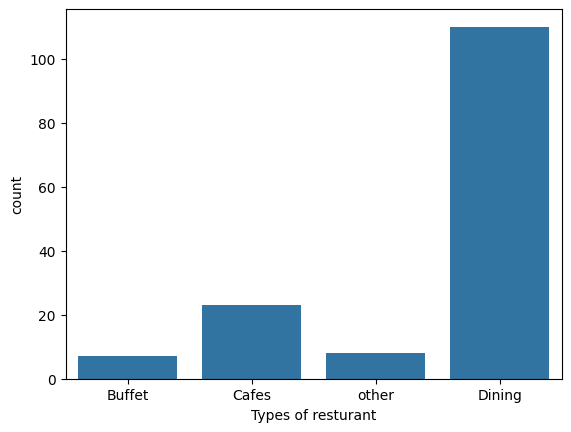

In [5]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of resturant")

Text(0, 0.5, 'Votes')

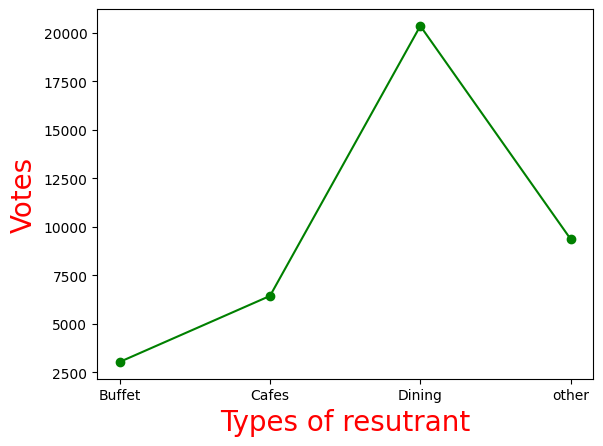

In [6]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c = "green", marker = "o")
plt.xlabel("Types of resutrant",c = "red", size = 20)
plt.ylabel("Votes",c = "red", size = 20)

<h3>Conclusion 1 most of the genral public prefer Dining resturant</h3>

In [7]:
# findig the resturant with maximum votes
max_votes = df['votes'].max()
resturant_max_votes = df.loc[df["votes"]==max_votes,'name']
print("Resturant with max votes is " + resturant_max_votes)

38    Resturant with max votes is Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

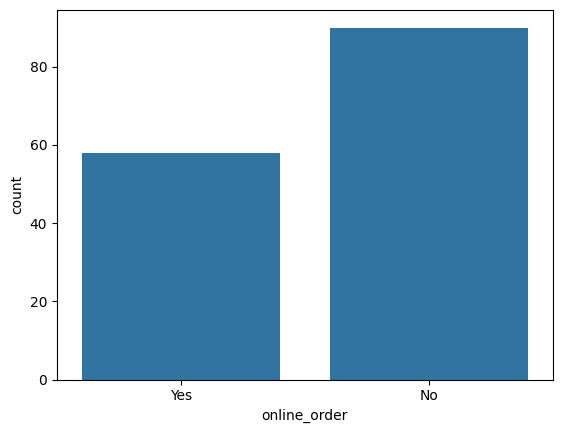

In [8]:
sns.countplot(x = df['online_order'])

<h4>Conclusion 2 the maximum of the resturant does not accept the online orders</h4>

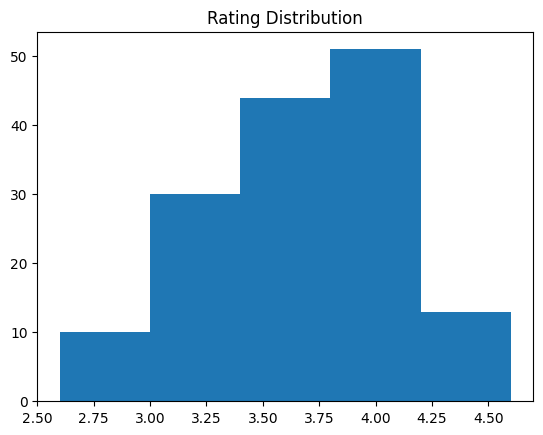

In [10]:
plt.hist(df['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

<h4>Conclusion 3 the most of the resturant are rated with range of rating of 3 to 4</h4>

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

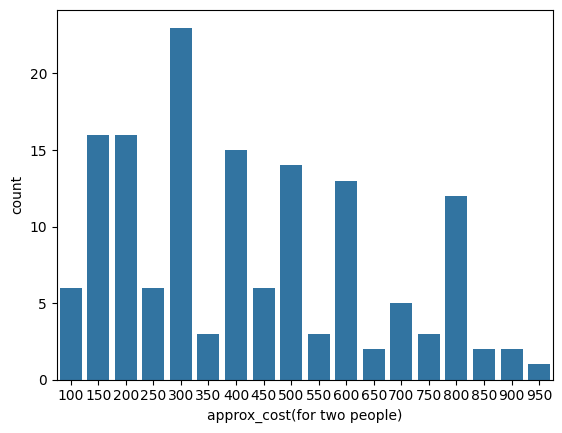

In [11]:
rate_data = df['approx_cost(for two people)']
sns.countplot(x = rate_data)

<h4>conclusion 4 Maximum people prefer the resturant with approx cost of 300</h4>

C:\Users\amins\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='online_order', ylabel='rate'>

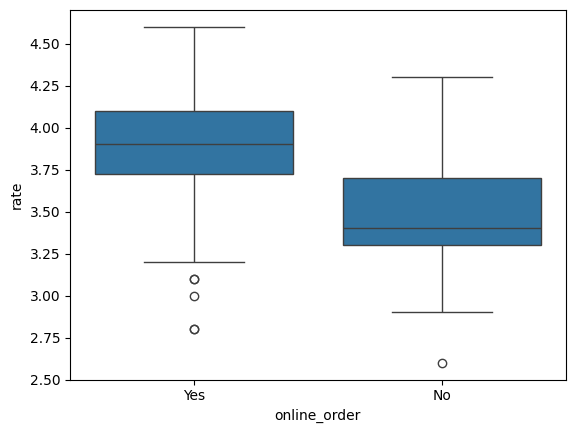

In [14]:
sns.boxplot(x = 'online_order',y = 'rate', data = df)
#plt.figure(figsize = (5,5))

<h4>Conclusion 5 offline order are having lower rating compare to online order</h4>

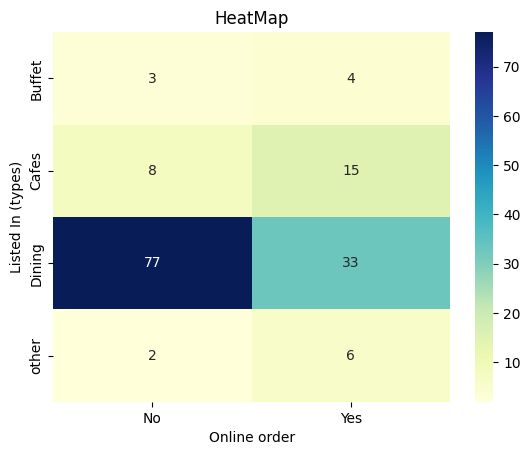

In [16]:
pivot_table = df.pivot_table(index='listed_in(type)',columns= 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot = True, cmap = "YlGnBu", fmt='d')
plt.title("HeatMap")
plt.xlabel("Online order")
plt.ylabel("Listed In (types)")
plt.show()

<h4>Conclusion 6 Dining resturant primarily gets offline ordert at max orders and cafe gets online orders. This suggest that client prefer to place order online for snacks and would like to recive their meals at the resturants</h4>